# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import csv
import os
from scipy import stats
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities=[]

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 605


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
base_url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = base_url + "q=" + city + "&appid=" + weather_api_key
    #https://api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()["weather"]

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = requests.get(city_url).json()["coord"]["lat"]
        city_lng = requests.get(city_url).json()["coord"]["lon"]
        city_max_temp = requests.get(city_url).json()["main"]["temp_max"]
        city_humidity = requests.get(city_url).json()["main"]["humidity"]
        city_clouds = requests.get(city_url).json()["clouds"]["all"]
        city_wind = requests.get(city_url).json()["wind"]["speed"]
        city_country = requests.get(city_url).json()["sys"]["country"]
        city_date = requests.get(city_url).json()["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | chipata
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | blackmans bay
Processing Record 4 of Set 1 | grytviken
Processing Record 5 of Set 1 | puerto ayora
Processing Record 6 of Set 1 | pangoa
Processing Record 7 of Set 1 | tiksi
Processing Record 8 of Set 1 | tura
Processing Record 9 of Set 1 | utrik
Processing Record 10 of Set 1 | bhisho
Processing Record 11 of Set 1 | carnarvon
Processing Record 12 of Set 1 | tobruk
Processing Record 13 of Set 1 | quellon
Processing Record 14 of Set 1 | bethel
Processing Record 15 of Set 1 | codrington
Processing Record 16 of Set 1 | yellowknife
Processing Record 17 of Set 1 | taiohae
City not found. Skipping...
Processing Record 18 of Set 1 | aripuana
Processing Record 19 of Set 1 | benghazi
Processing Record 20 of Set 1 | bilibino
Processing Record 21 of Set 1 | cruces
Processing Record 22 of Set 1 | el porvenir
Processing Rec

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame.from_dict(city_data)

# Show Record Count
city_data_df.count()

City          571
Lat           571
Lng           571
Max Temp      571
Humidity      571
Cloudiness    571
Wind Speed    571
Country       571
Date          571
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,chipata,-13.6333,32.6500,286.37,95,98,2.16,ZM,1682564133
1,port-aux-francais,-49.3500,70.2167,279.58,97,100,10.41,TF,1682564134
2,blackmans bay,-43.0167,147.3167,290.78,75,100,3.61,AU,1682564135
3,grytviken,-54.2811,-36.5092,273.83,73,100,4.13,GS,1682564137
4,puerto ayora,-0.7393,-90.3518,297.90,93,6,1.34,EC,1682564138


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("Output_data_cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("Output_data_cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,chipata,-13.6333,32.6500,286.37,95,98,2.16,ZM,1682564133
1,port-aux-francais,-49.3500,70.2167,279.58,97,100,10.41,TF,1682564134
2,blackmans bay,-43.0167,147.3167,290.78,75,100,3.61,AU,1682564135
3,grytviken,-54.2811,-36.5092,273.83,73,100,4.13,GS,1682564137
4,puerto ayora,-0.7393,-90.3518,297.90,93,6,1.34,EC,1682564138


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

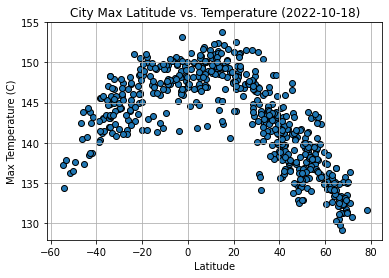

In [8]:
# Build scatter plot for latitude vs. temperature
temp_cel = []

temp_far = city_data_df["Max Temp"]

for row in range(len(temp_far)):
    temp_cel.append((temp_far[row] - 32)*(5/9))

plt.scatter(city_data_df["Lat"], temp_cel, edgecolors= "black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Max Latitude vs. Temperature (2022-10-18)")
plt.grid(True)

# Save the figure
plt.savefig("output_data_Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

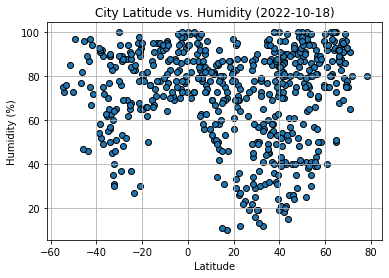

In [17]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors= "black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.grid(True)

# Save the figure
plt.savefig("output_data_Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

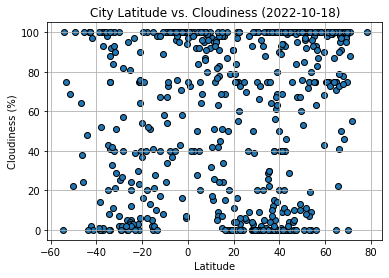

In [18]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors= "black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.grid(True)

# Save the figure
plt.savefig("output_data_Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

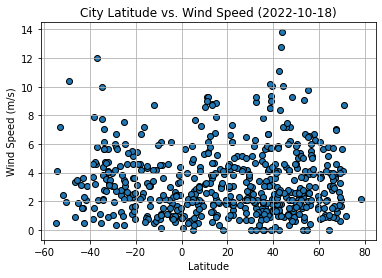

In [19]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors= "black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.grid(True)

# Save the figure
plt.savefig("output_data_Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [20]:
# Define a function to create Linear Regression plots
def make_scatter_plot(x_values, y_values, x_label, y_label, title, filename, textcoords):
    plt.scatter(
        x_values, 
        y_values,
        edgecolor="black", 
        linewidths=1, 
        marker="o", 
        alpha=0.8,
        label="Unused"
    )
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,textcoords,fontsize=15,color="red")
    print(f"The r-value is: {rvalue**2}")
    
    plt.title(title)
    plt.ylabel(y_label)
    plt.xlabel(x_label)
    plt.grid(False)
   
    plt.savefig(filename)

    plt.show()

In [21]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
pd.to_numeric(city_data_df["Lat"])

city_data_df["Max Temp (C)"] = (city_data_df["Max Temp"] -32) * 5/9

northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Max Temp (C)
City_ID,,,,,,,,,,
6,tiksi,71.6872,128.8694,267.26,80,55,0.98,RU,1682564141,130.700000
7,tura,25.5198,90.2201,304.83,29,5,1.77,IN,1682564142,151.572222
8,utrik,11.2278,169.8474,299.97,82,26,9.26,MH,1682564143,148.872222
11,tobruk,32.0836,23.9764,290.65,78,0,6.31,LY,1682564116,143.694444
13,bethel,41.3712,-73.4140,282.70,82,94,1.66,US,1682564150,139.277778


In [22]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
pd.to_numeric(city_data_df["Lat"])
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Max Temp (C)
City_ID,,,,,,,,,,
0,chipata,-13.6333,32.6500,286.37,95,98,2.16,ZM,1682564133,141.316667
1,port-aux-francais,-49.3500,70.2167,279.58,97,100,10.41,TF,1682564134,137.544444
2,blackmans bay,-43.0167,147.3167,290.78,75,100,3.61,AU,1682564135,143.766667
3,grytviken,-54.2811,-36.5092,273.83,73,100,4.13,GS,1682564137,134.350000
4,puerto ayora,-0.7393,-90.3518,297.90,93,6,1.34,EC,1682564138,147.722222


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7536051593325535


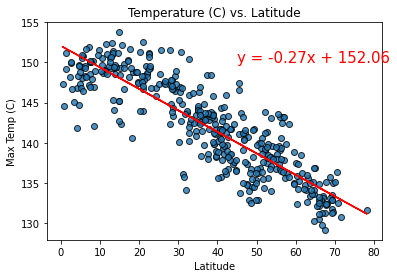

In [23]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp (C)"]
make_scatter_plot(x_values, y_values, "Latitude", "Max Temp (C)", "Temperature (C) vs. Latitude", ".north_tempvlat.png", (45, 150))
plt.show()

The r-value is: 0.49798534039803444


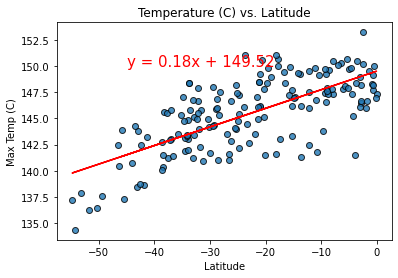

In [24]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp (C)"]
make_scatter_plot(x_values, y_values, "Latitude", "Max Temp (C)", "Temperature (C) vs. Latitude", ".latvtemp_south_output-file.png", (-45, 150))
plt.show()

**Discussion about the linear relationship:** For the northern hemisphere, there is a relatively strong linear relationship between temperature vs. latitude because the r-value is close to 1. As the latitude increases, the max temperature decreases, which indicates a negative correlation. For the southern hemisphere, there is a moderately strong linear relationship between temperature vs. latitude because r-value is around midway between 1 and 0. Here, there is a positive correlation between latitude and temperature. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.015327236927819


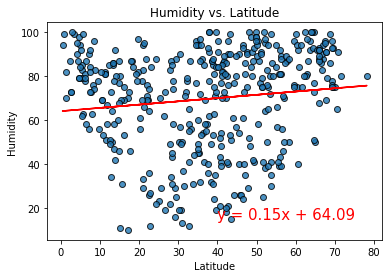

In [25]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
make_scatter_plot(x_values, y_values, "Latitude", "Humidity", "Humidity vs. Latitude", ".northern_humidvlat.png", (40, 15))
plt.show()

The r-value is: 0.07473298642439735


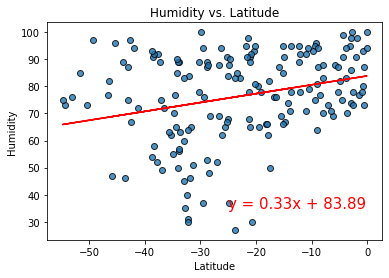

In [26]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
make_scatter_plot(x_values, y_values, "Latitude", "Humidity", "Humidity vs. Latitude", ".south_humidvlat.png", (-25, 35))
plt.show()

**Discussion about the linear relationship:** For both the northern and southern hemisphere, there is basically no correlation between latitude and humidity because the r-value is very close to 0. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.018475141671621054


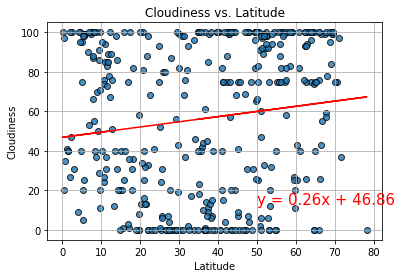

In [47]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
make_scatter_plot(x_values, y_values, "Latitude", "Cloudiness", "Cloudiness vs. Latitude", ".north_cloudinessvlat.png", (50,13))
plt.show()

The r-value is: 0.01356435740994153


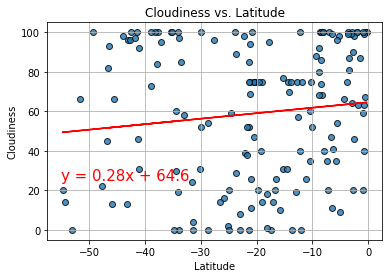

In [49]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
make_scatter_plot(x_values,y_values , "Latitude", "Cloudiness", "Cloudiness vs. Latitude", ".south_cloudinessvlat.png", (-55,25))
plt.show()

**Discussion about the linear relationship:** For both the northern and southern hemisphere, there is no correleation between latitude and cloudiness because the r-value is close to 0. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0017890624849161009


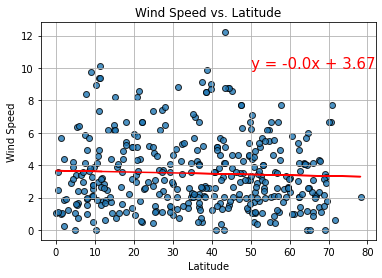

In [55]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
make_scatter_plot(x_values, y_values, "Latitude", "Wind Speed", "Wind Speed vs. Latitude", ".northern_windspeedvlat.png", (50,10))
plt.show()

The r-value is: 0.031582785402412786


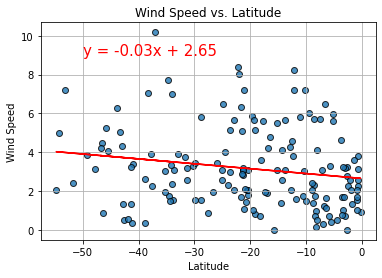

In [58]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
make_scatter_plot(x_values,y_values, "Latitude", "Wind Speed", "Wind Speed vs. Latitude", ".southern_windspeedvlat.png", (-50, 9))
plt.show()

**Discussion about the linear relationship:** Similarily, for both the northern and southern hemisphere, there is no correlation between latitude and wind speed since the r value is very close to 0. 